In [401]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-tracking-historic-us-values-dataset/daily.csv
/kaggle/input/covid-tracking-historic-us-values-dataset/daily.json


## Notebook Link

https://www.kaggle.com/aliessamali/covid-19-data-analysis-and-prediction-on-data-api

## GitHub Repository

https://github.com/aliduku/COVID-19_Case_Prediction_App/tree/main

# Importing Data

In [402]:
import requests as r
url = 'https://api.covidtracking.com/v1/us/daily.json'
resp = r.get(url)
resp.status_code

200

In [403]:
raw_data = resp.json()

In [404]:
# Convert JSON to DataFrame Using read_json()
df = pd.DataFrame(raw_data)
df.head(10)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
5,20210302,56,28453529.0,73590280.0,11196.0,46388.0,768649.0,9465.0,45084.0,3169.0,...,2021-03-02T24:00:00Z,None,0,0,1728,1871,255779,54248,1343519,f90cfd6129805f923153eb8da22a86b75eedf8fd
6,20210301,56,28399281.0,73334501.0,11748.0,46738.0,766778.0,9595.0,44956.0,3171.0,...,2021-03-01T24:00:00Z,None,0,0,1241,1024,118077,48092,1154440,fe110199c554cbfbc73cba70a79f621483b58633
7,20210228,56,28351189.0,73216424.0,11708.0,47352.0,765754.0,9802.0,44907.0,3245.0,...,2021-02-28T24:00:00Z,None,0,0,1051,879,203599,54349,1408422,e6707b320942dd3747d8bf8f6d9eb3df51d3eb9b
8,20210227,56,28296840.0,73012825.0,11731.0,48871.0,764875.0,10114.0,44875.0,3335.0,...,2021-02-27T24:00:00Z,None,0,0,1847,1428,205090,71245,1655179,d147391f796f2e12e030e88d732e1fcc3332ba0f
9,20210226,56,28225595.0,72807735.0,11945.0,51112.0,763447.0,10466.0,44791.0,3466.0,...,2021-02-26T24:00:00Z,None,0,0,2141,1868,276829,74857,1803309,a8e3b540b405af9291478478833507c9150982c9


# Exploring

In [405]:
df.tail(10)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
410,20200122,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-22T24:00:00Z,None,0,0,0,0,0,0,1,ffee280533875f8ba1b85294085e74919fcc3ec2
411,20200121,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-21T24:00:00Z,None,0,0,0,0,0,1,0,1eeddf821d7b9cd08a5ff80a5dca47f4693e4eba
412,20200120,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-20T24:00:00Z,None,0,0,0,0,0,0,0,776e42ed9cc6026fcf1e885daaa7dff4fb4b0b3f
413,20200119,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-19T24:00:00Z,None,0,0,0,0,0,1,0,c989920d1706d11b097eaaf5a20bc4d081d1208c
414,20200118,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-18T24:00:00Z,None,0,0,0,0,0,0,0,2394f592b3b27ff21aaebc736a404177acd71927
415,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,None,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,None,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,None,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,None,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8
419,20200113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-13T24:00:00Z,None,0,0,0,0,0,0,0,5672debf187b183735be63f6bd85834ead0047ff


In [406]:
df.shape

(420, 25)

In [407]:
df.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'dateChecked', 'death', 'hospitalized', 'totalTestResults',
       'lastModified', 'recovered', 'total', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash'],
      dtype='object')

In [408]:
df.describe()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,totalTestResults,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.200000e+02,420.000000,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,...,392.000000,369.000000,4.200000e+02,420.0,420.0,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,2.020218e+07,49.476190,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,...,187210.668367,310817.140921,1.073369e+08,0.0,0.0,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,3.472227e+03,16.896764,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,...,142331.657380,235557.870159,1.129172e+08,0.0,0.0,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,2.020011e+07,1.000000,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,0.000000,4.000000,0.000000e+00,0.0,0.0,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,2.020043e+07,56.000000,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,...,86911.750000,123250.000000,5.888598e+06,0.0,0.0,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,2.020081e+07,56.000000,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,...,169118.500000,280138.000000,6.839699e+07,0.0,0.0,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,2.020112e+07,56.000000,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,...,258912.250000,481309.000000,1.854937e+08,0.0,0.0,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.021031e+07,56.000000,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,...,515151.000000,776361.000000,3.638251e+08,0.0,0.0,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [410]:
# Convert the date column to pandas datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(10)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0
5,2021-03-02,56,28453529.0,73590280.0,11196.0,46388.0,768649.0,9465.0,45084.0,3169.0,...,2021-03-02T24:00:00Z,None,0,0,1728,1871,255779,54248,1343519,f90cfd6129805f923153eb8da22a86b75eedf8fd
6,2021-03-01,56,28399281.0,73334501.0,11748.0,46738.0,766778.0,9595.0,44956.0,3171.0,...,2021-03-01T24:00:00Z,None,0,0,1241,1024,118077,48092,1154440,fe110199c554cbfbc73cba70a79f621483b58633
7,2021-02-28,56,28351189.0,73216424.0,11708.0,47352.0,765754.0,9802.0,44907.0,3245.0,...,2021-02-28T24:00:00Z,None,0,0,1051,879,203599,54349,1408422,e6707b320942dd3747d8bf8f6d9eb3df51d3eb9b
8,2021-02-27,56,28296840.0,73012825.0,11731.0,48871.0,764875.0,10114.0,44875.0,3335.0,...,2021-02-27T24:00:00Z,None,0,0,1847,1428,205090,71245,1655179,d147391f796f2e12e030e88d732e1fcc3332ba0f
9,2021-02-26,56,28225595.0,72807735.0,11945.0,51112.0,763447.0,10466.0,44791.0,3466.0,...,2021-02-26T24:00:00Z,None,0,0,2141,1868,276829,74857,1803309,a8e3b540b405af9291478478833507c9150982c9


In [411]:
# Printing unique values in data
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "date":
 ['2021-03-07T00:00:00.000000000' '2021-03-06T00:00:00.000000000'
 '2021-03-05T00:00:00.000000000' '2021-03-04T00:00:00.000000000'
 '2021-03-03T00:00:00.000000000' '2021-03-02T00:00:00.000000000'
 '2021-03-01T00:00:00.000000000' '2021-02-28T00:00:00.000000000'
 '2021-02-27T00:00:00.000000000' '2021-02-26T00:00:00.000000000'
 '2021-02-25T00:00:00.000000000' '2021-02-24T00:00:00.000000000'
 '2021-02-23T00:00:00.000000000' '2021-02-22T00:00:00.000000000'
 '2021-02-21T00:00:00.000000000' '2021-02-20T00:00:00.000000000'
 '2021-02-19T00:00:00.000000000' '2021-02-18T00:00:00.000000000'
 '2021-02-17T00:00:00.000000000' '2021-02-16T00:00:00.000000000'
 '2021-02-15T00:00:00.000000000' '2021-02-14T00:00:00.000000000'
 '2021-02-13T00:00:00.000000000' '2021-02-12T00:00:00.000000000'
 '2021-02-11T00:00:00.000000000' '2021-02-10T00:00:00.000000000'
 '2021-02-09T00:00:00.000000000' '2021-02-08T00:00:00.000000000'
 '2021-02-07T00:00:00.000000000' '2021-02-06T00:00:00.000000000'

In [412]:
# dropping repeated, empty and id columns
df.drop(['lastModified', 'hash', 'dateChecked', 'recovered', 'total', 'posNeg', 'states', 'hospitalized'], axis = 1, inplace = True)
df.head(10)

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2021-03-07,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,4281.0,515151.0,363825123,842,726,131835,41835,1170059
1,2021-03-06,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,4280.0,514309.0,362655064,1680,503,143835,60015,1430992
2,2021-03-05,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,4275.0,512629.0,361224072,2221,2781,271917,68787,1744417
3,2021-03-04,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,4267.0,510408.0,359479655,1743,1530,177957,65487,1590984
4,2021-03-03,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,4260.0,508665.0,357888671,2449,2172,267001,66836,1406795
5,2021-03-02,28453529.0,73590280.0,11196.0,46388.0,768649.0,9465.0,45084.0,3169.0,4257.0,506216.0,356481876,1728,1871,255779,54248,1343519
6,2021-03-01,28399281.0,73334501.0,11748.0,46738.0,766778.0,9595.0,44956.0,3171.0,4252.0,504488.0,355138357,1241,1024,118077,48092,1154440
7,2021-02-28,28351189.0,73216424.0,11708.0,47352.0,765754.0,9802.0,44907.0,3245.0,4252.0,503247.0,353983917,1051,879,203599,54349,1408422
8,2021-02-27,28296840.0,73012825.0,11731.0,48871.0,764875.0,10114.0,44875.0,3335.0,4252.0,502196.0,352575495,1847,1428,205090,71245,1655179
9,2021-02-26,28225595.0,72807735.0,11945.0,51112.0,763447.0,10466.0,44791.0,3466.0,4247.0,500349.0,350920316,2141,1868,276829,74857,1803309


In [413]:
# Sort the DataFrame in ascending order based on the 'date' column
df = df.sort_values(by='date')

# Reset the index of the sorted DataFrame
df.reset_index(drop=True, inplace=True)

df.head(10)

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,2020-01-14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,2020-01-15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,2020-01-16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,2020-01-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
5,2020-01-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
6,2020-01-19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
7,2020-01-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
8,2020-01-21,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0
9,2020-01-22,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1


# Cleaning

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      420 non-null    datetime64[ns]
 1   positive                  419 non-null    float64       
 2   negative                  372 non-null    float64       
 3   pending                   369 non-null    float64       
 4   hospitalizedCurrently     356 non-null    float64       
 5   hospitalizedCumulative    369 non-null    float64       
 6   inIcuCurrently            347 non-null    float64       
 7   inIcuCumulative           348 non-null    float64       
 8   onVentilatorCurrently     348 non-null    float64       
 9   onVentilatorCumulative    341 non-null    float64       
 10  death                     392 non-null    float64       
 11  totalTestResults          420 non-null    int64         
 12  deathIncrease         

In [415]:
df.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.190000e+02,3.720000e+02,369.000000,356.000000,369.000000,347.000000,348.000000,348.000000,341.000000,392.000000,4.200000e+02,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,8.116687e+06,3.030351e+07,9617.308943,57987.117978,310817.140921,12059.227666,21059.344828,3975.298851,2173.932551,187210.668367,1.073369e+08,1226.550000,1848.478571,177578.154762,68467.830952,8.662503e+05
std,8.967432e+06,2.407815e+07,9920.899709,31898.555998,235557.870159,5668.415483,13572.638376,2191.080602,1327.372196,142331.657380,1.129172e+08,1070.129644,1708.460481,121544.473208,68682.221496,6.579460e+05
min,0.000000e+00,2.000000e+00,106.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,32.000000,0.000000,0.000000e+00,0.000000,-2858.000000,-658774.000000,0.000000,0.000000e+00
25%,1.004386e+06,6.753778e+06,3377.000000,35100.500000,123250.000000,7495.500000,9900.250000,2168.500000,951.000000,86911.750000,5.888598e+06,439.750000,765.750000,79236.750000,22462.500000,2.388558e+05
50%,5.044337e+06,2.757246e+07,9939.000000,48811.000000,280138.000000,10114.000000,18797.500000,3186.500000,2107.000000,169118.500000,6.839699e+07,1016.000000,1490.000000,206620.000000,44664.500000,8.223685e+05
75%,1.234137e+07,5.084301e+07,11957.000000,70519.250000,481309.000000,15596.500000,32998.500000,5828.500000,3430.000000,258912.250000,1.854937e+08,1642.500000,2467.000000,260621.000000,89684.250000,1.401706e+06
max,2.875649e+07,7.458282e+07,65698.000000,132474.000000,776361.000000,23912.000000,45475.000000,8004.000000,4281.000000,515151.000000,3.638251e+08,5427.000000,17155.000000,480256.000000,295121.000000,2.309884e+06


In [416]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

onVentilatorCumulative      79
inIcuCurrently              73
onVentilatorCurrently       72
inIcuCumulative             72
hospitalizedCurrently       64
pending                     51
hospitalizedCumulative      51
negative                    48
death                       28
positive                     1
hospitalizedIncrease         0
positiveIncrease             0
negativeIncrease             0
date                         0
deathIncrease                0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64

In [417]:
df.columns

Index(['date', 'positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'death',
       'totalTestResults', 'deathIncrease', 'hospitalizedIncrease',
       'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [418]:
nan_columns = ['positive', 'negative', 'pending',
               'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently',
               'death']

In [419]:
# List to store column names with first NaN index value less than 10
zero_fill_columns = []
other_fill_columns = []

for col in nan_columns:
    # Find the row index where each column starts to have a value
    first_non_nan_index = df[col].first_valid_index()
    print(f"First non-NaN index for column {col}: {first_non_nan_index}")
    print(df[col][first_non_nan_index])
    print(df[col][first_non_nan_index+1])

    # Check if the first NaN index value is less than 10
    if df[col][first_non_nan_index] < 10:
        zero_fill_columns.append(col)
    else:
        other_fill_columns.append(col)

First non-NaN index for column positive: 1
0.0
0.0
First non-NaN index for column negative: 48
2.0
3.0
First non-NaN index for column pending: 51
106.0
211.0
First non-NaN index for column hospitalizedCurrently: 64
325.0
416.0
First non-NaN index for column inIcuCurrently: 73
1299.0
1792.0
First non-NaN index for column onVentilatorCurrently: 72
167.0
258.0
First non-NaN index for column death: 28
0.0
0.0


In [420]:
print("Columns with first NaN index value less than 10:", zero_fill_columns)
print("Other columns to fill:", other_fill_columns)

Columns with first NaN index value less than 10: ['positive', 'negative', 'death']
Other columns to fill: ['pending', 'hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently']


In [421]:
# Fill the specified columns with zeros
df[zero_fill_columns] = df[zero_fill_columns].fillna(0)

In [422]:
for column in other_fill_columns:
    first_non_nan = df[column].first_valid_index()
    next_non_nan = df[column][first_non_nan]

    num_nan_values = first_non_nan
    fill_values = np.arange(0, next_non_nan, next_non_nan / num_nan_values)
    fill_values = np.round(fill_values).astype(int)
    df.loc[df.index[:first_non_nan], column] = fill_values

In [423]:
# Calculate cumulative columns for selected columns
current_columns = ['hospitalizedCurrently', 'inIcuCurrently', 'onVentilatorCurrently']
cumulative_columns = ['hospitalizedCumulative', 'inIcuCumulative', 'onVentilatorCumulative']
df[cumulative_columns] = df[current_columns].cumsum()

In [424]:
# Replace negative values in selected columns with their absolute values
columns_to_abs = ['negativeIncrease', 'hospitalizedIncrease']
df[columns_to_abs] = df[columns_to_abs].applymap(lambda x: abs(x) if x < 0 else x)

In [425]:
df.head(200)

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,2020-01-14,0.0,0.0,2.0,5.0,5.0,18.0,18.0,2.0,2.0,0.0,0,0,0,0,0,0
2,2020-01-15,0.0,0.0,4.0,10.0,15.0,36.0,54.0,5.0,7.0,0.0,0,0,0,0,0,0
3,2020-01-16,0.0,0.0,6.0,15.0,30.0,53.0,107.0,7.0,14.0,0.0,0,0,0,0,0,0
4,2020-01-17,0.0,0.0,8.0,20.0,50.0,71.0,178.0,9.0,23.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-07-26,4209320.0,18807242.0,3361.0,58731.0,5248263.0,10424.0,1227899.0,2723.0,446224.0,139251.0,56353715,561,1380,290147,60768,859179
196,2020-07-27,4263804.0,19050243.0,3398.0,58987.0,5307250.0,10183.0,1238082.0,2723.0,448947.0,140317.0,57122702,1066,1632,243001,54484,768987
197,2020-07-28,4322256.0,19284371.0,3600.0,57185.0,5364435.0,10414.0,1248496.0,2748.0,451695.0,141428.0,57965096,1111,4067,234128,58452,842394
198,2020-07-29,4386412.0,19571749.0,3840.0,57423.0,5421858.0,10435.0,1258931.0,2771.0,454466.0,142933.0,58873793,1505,2860,287378,64156,908697


In [426]:
df.describe()

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,4.200000e+02,4.200000e+02,420.000000,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000,420.000000,420.000000,420.000000,4.200000e+02
mean,8.097361e+06,2.684025e+07,8455.802381,49175.359524,6.993088e+06,10074.561905,1.523541e+06,3307.935714,5.110127e+05,174729.957143,1.073369e+08,1226.550000,1865.669048,181734.130952,68467.830952,8.662503e+05
std,8.965476e+06,2.462758e+07,9809.624794,35986.685961,6.249193e+06,6732.412263,1.270182e+06,2476.700489,4.130668e+05,145225.627340,1.129172e+08,1070.129644,1689.626250,115222.401108,68682.221496,6.579460e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.861690e+05,2.049857e+06,2417.000000,30033.000000,1.436810e+06,6300.250000,3.900170e+05,1630.750000,1.291312e+05,52407.500000,5.888598e+06,439.750000,774.250000,80563.000000,22462.500000,2.388558e+05
50%,5.023652e+06,2.218214e+07,8563.500000,43463.000000,6.031184e+06,9134.000000,1.374336e+06,2634.500000,4.850375e+05,154802.000000,6.839699e+07,1016.000000,1492.500000,208387.500000,44664.500000,8.223685e+05
75%,1.230270e+07,4.803752e+07,11735.250000,59796.500000,1.050031e+07,14260.500000,2.271688e+06,5260.000000,7.266988e+05,248777.250000,1.854937e+08,1642.500000,2488.000000,260898.750000,89684.250000,1.401706e+06
max,2.875649e+07,7.458282e+07,65698.000000,132474.000000,2.065365e+07,23912.000000,4.231316e+06,8004.000000,1.389333e+06,515151.000000,3.638251e+08,5427.000000,17155.000000,658774.000000,295121.000000,2.309884e+06


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      420 non-null    datetime64[ns]
 1   positive                  420 non-null    float64       
 2   negative                  420 non-null    float64       
 3   pending                   420 non-null    float64       
 4   hospitalizedCurrently     420 non-null    float64       
 5   hospitalizedCumulative    420 non-null    float64       
 6   inIcuCurrently            420 non-null    float64       
 7   inIcuCumulative           420 non-null    float64       
 8   onVentilatorCurrently     420 non-null    float64       
 9   onVentilatorCumulative    420 non-null    float64       
 10  death                     420 non-null    float64       
 11  totalTestResults          420 non-null    int64         
 12  deathIncrease         

# Visualizing

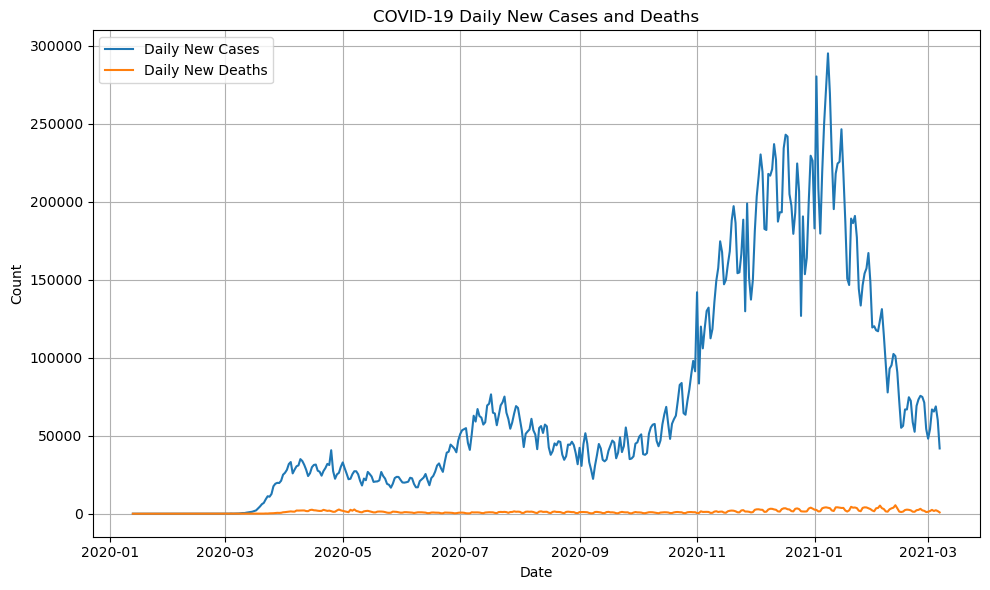

In [428]:
# Plotting time series of daily new cases and deaths
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['positiveIncrease'], label='Daily New Cases')
plt.plot(df['date'], df['deathIncrease'], label='Daily New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Daily New Cases and Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

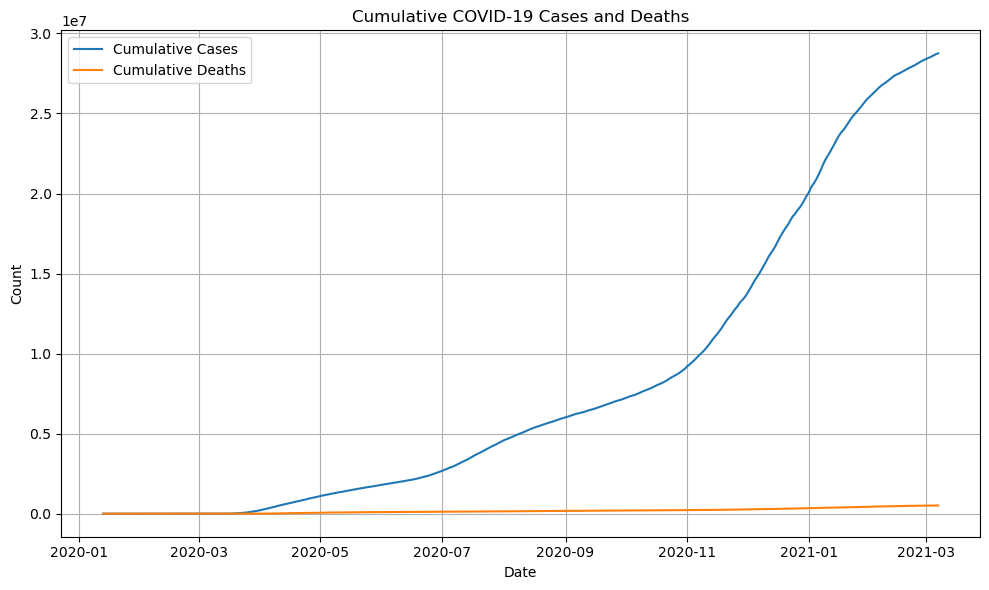

In [429]:
# Plotting cumulative COVID-19 cases and deaths over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['positive'], label='Cumulative Cases')
plt.plot(df['date'], df['death'], label='Cumulative Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Cumulative COVID-19 Cases and Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

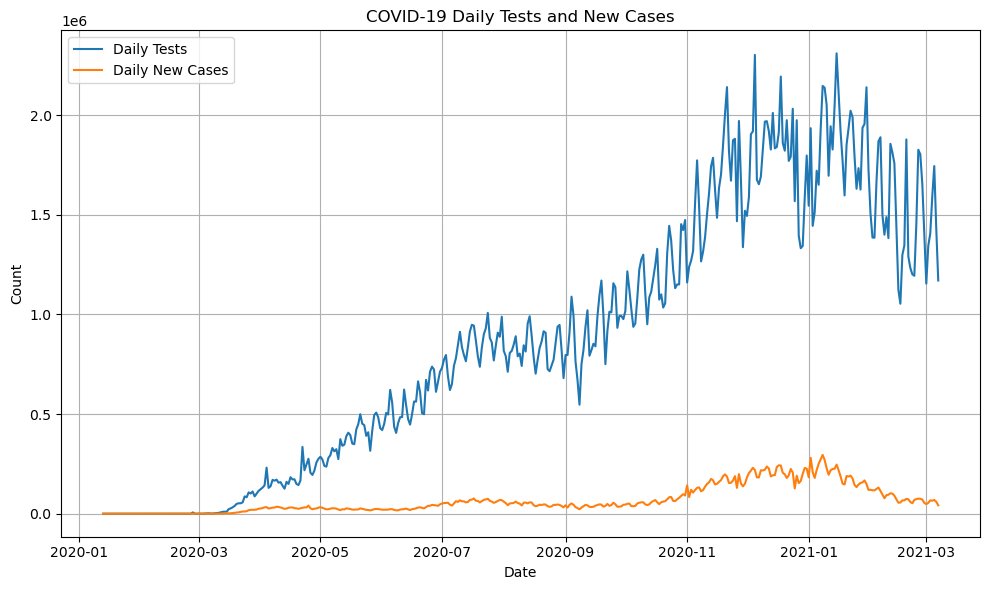

In [430]:
# Plotting daily tests conducted and daily new cases
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['totalTestResultsIncrease'], label='Daily Tests')
plt.plot(df['date'], df['positiveIncrease'], label='Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Daily Tests and New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

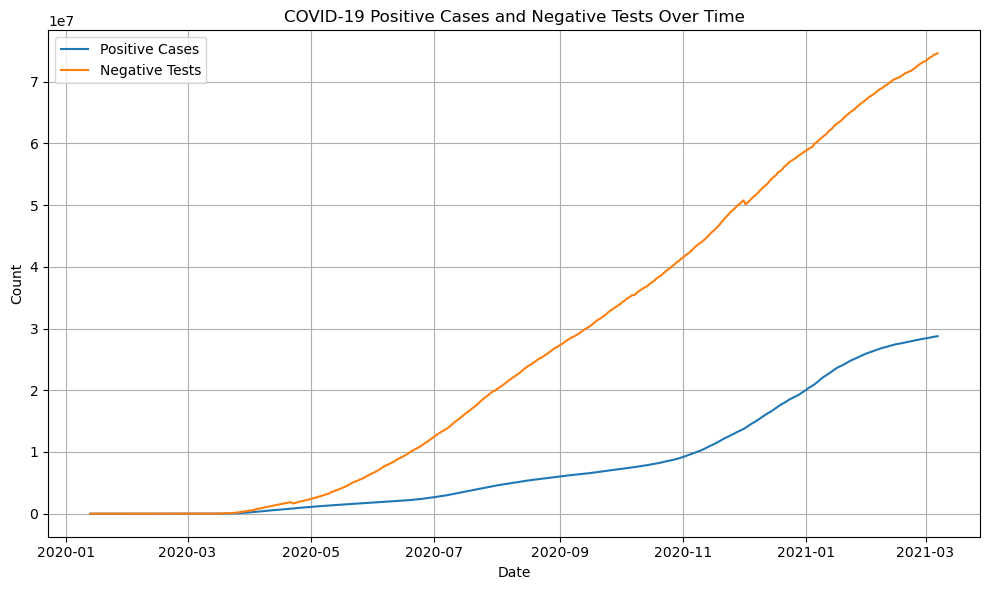

In [431]:
# Plotting positive cases and negative tests over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['positive'], label='Positive Cases')
plt.plot(df['date'], df['negative'], label='Negative Tests')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Positive Cases and Negative Tests Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

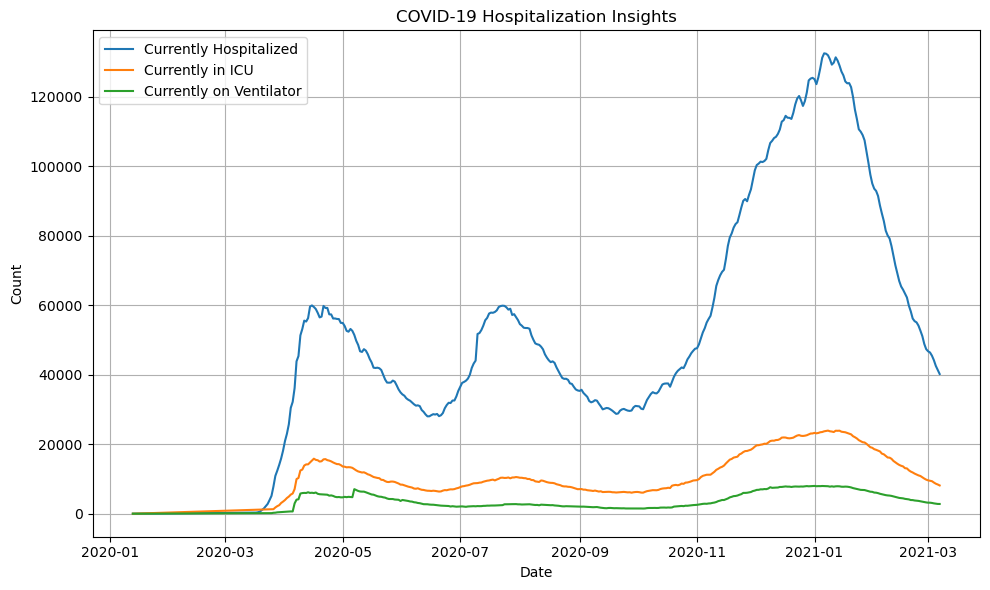

In [432]:
# Plotting Hospitalization Insights
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['hospitalizedCurrently'], label='Currently Hospitalized')
plt.plot(df['date'], df['inIcuCurrently'], label='Currently in ICU')
plt.plot(df['date'], df['onVentilatorCurrently'], label='Currently on Ventilator')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Hospitalization Insights')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

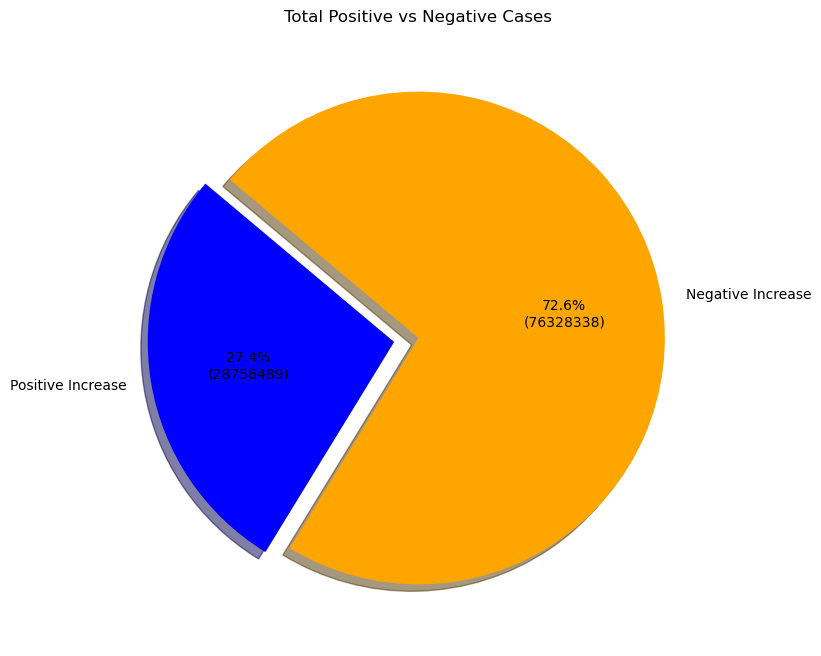

In [433]:
# Plot Total Positive vs Negative Cases
plt.figure(figsize=(8, 8))
positive_total = df['positiveIncrease'].sum()
negative_total = df['negativeIncrease'].sum()
labels = ['Positive Increase', 'Negative Increase']
sizes = [positive_total, negative_total]
colors = ['blue', 'orange']
explode = (0.1, 0)
# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100), shadow=True, startangle=140)
plt.title('Total Positive vs Negative Cases')
plt.show()

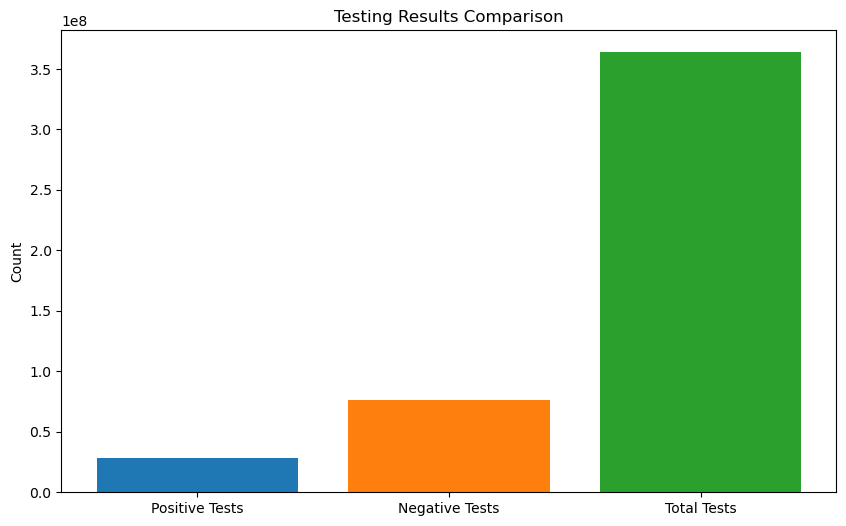

In [434]:
# Plot Testing Results Comparison
plt.figure(figsize=(10, 6))
plt.bar('Positive Tests', df['positiveIncrease'].sum())
plt.bar('Negative Tests', df['negativeIncrease'].sum())
plt.bar('Total Tests', df['totalTestResultsIncrease'].sum())
plt.ylabel('Count')
plt.title('Testing Results Comparison')
plt.show()

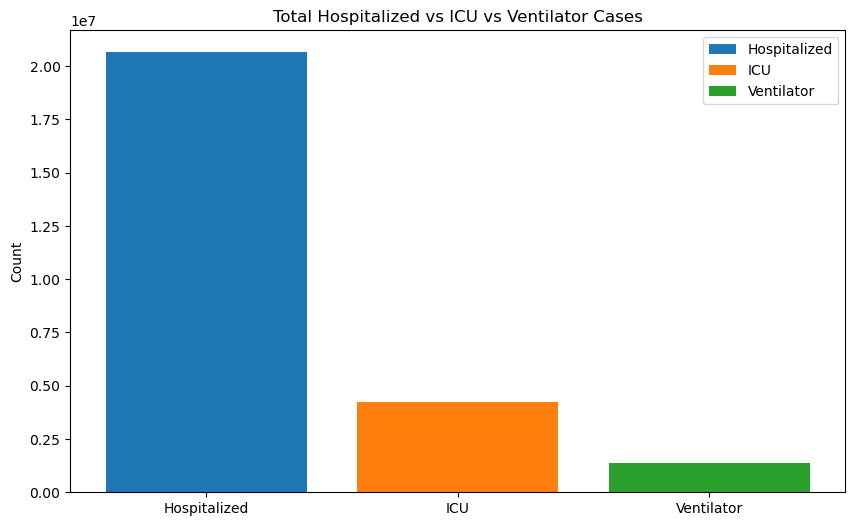

In [442]:
# Total Hospitalized vs ICU vs Ventilator Cases
plt.figure(figsize=(10, 6))
hospitalized_total = df['hospitalizedCurrently'].sum()
icu_total = df['inIcuCurrently'].sum()
ventilator_total = df['onVentilatorCurrently'].sum()
plt.bar('Hospitalized', hospitalized_total, label='Hospitalized')
plt.bar('ICU', icu_total, label='ICU')
plt.bar('Ventilator', ventilator_total, label='Ventilator')
plt.ylabel('Count')
plt.title('Total Hospitalized vs ICU vs Ventilator Cases')
plt.legend()
plt.show()

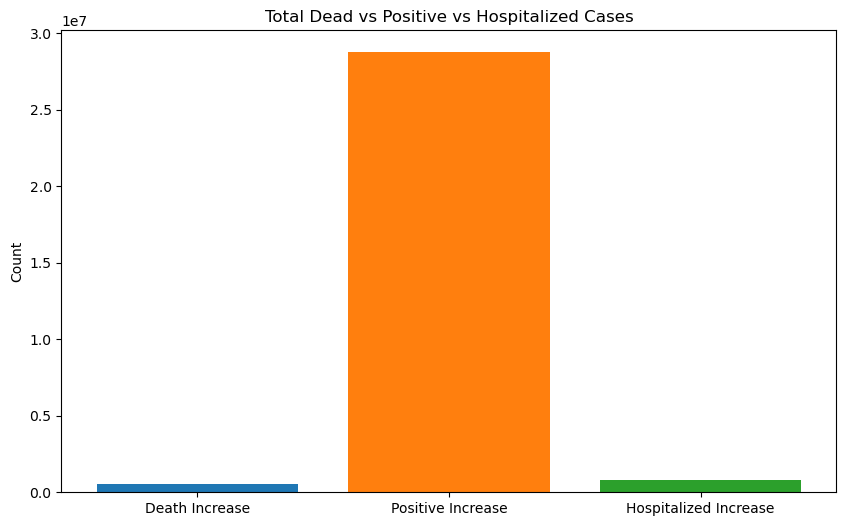

In [443]:
# Plot Total Dead vs Positive vs Hospitalized Cases
plt.figure(figsize=(10, 6))
death_total = df['deathIncrease'].sum()
positive_total = df['positiveIncrease'].sum()
hospitalized_total = df['hospitalizedIncrease'].sum()
plt.bar('Death Increase', death_total)
plt.bar('Positive Increase', positive_total)
plt.bar('Hospitalized Increase', hospitalized_total)
plt.ylabel('Count')
plt.title('Total Dead vs Positive vs Hospitalized Cases')
plt.show()

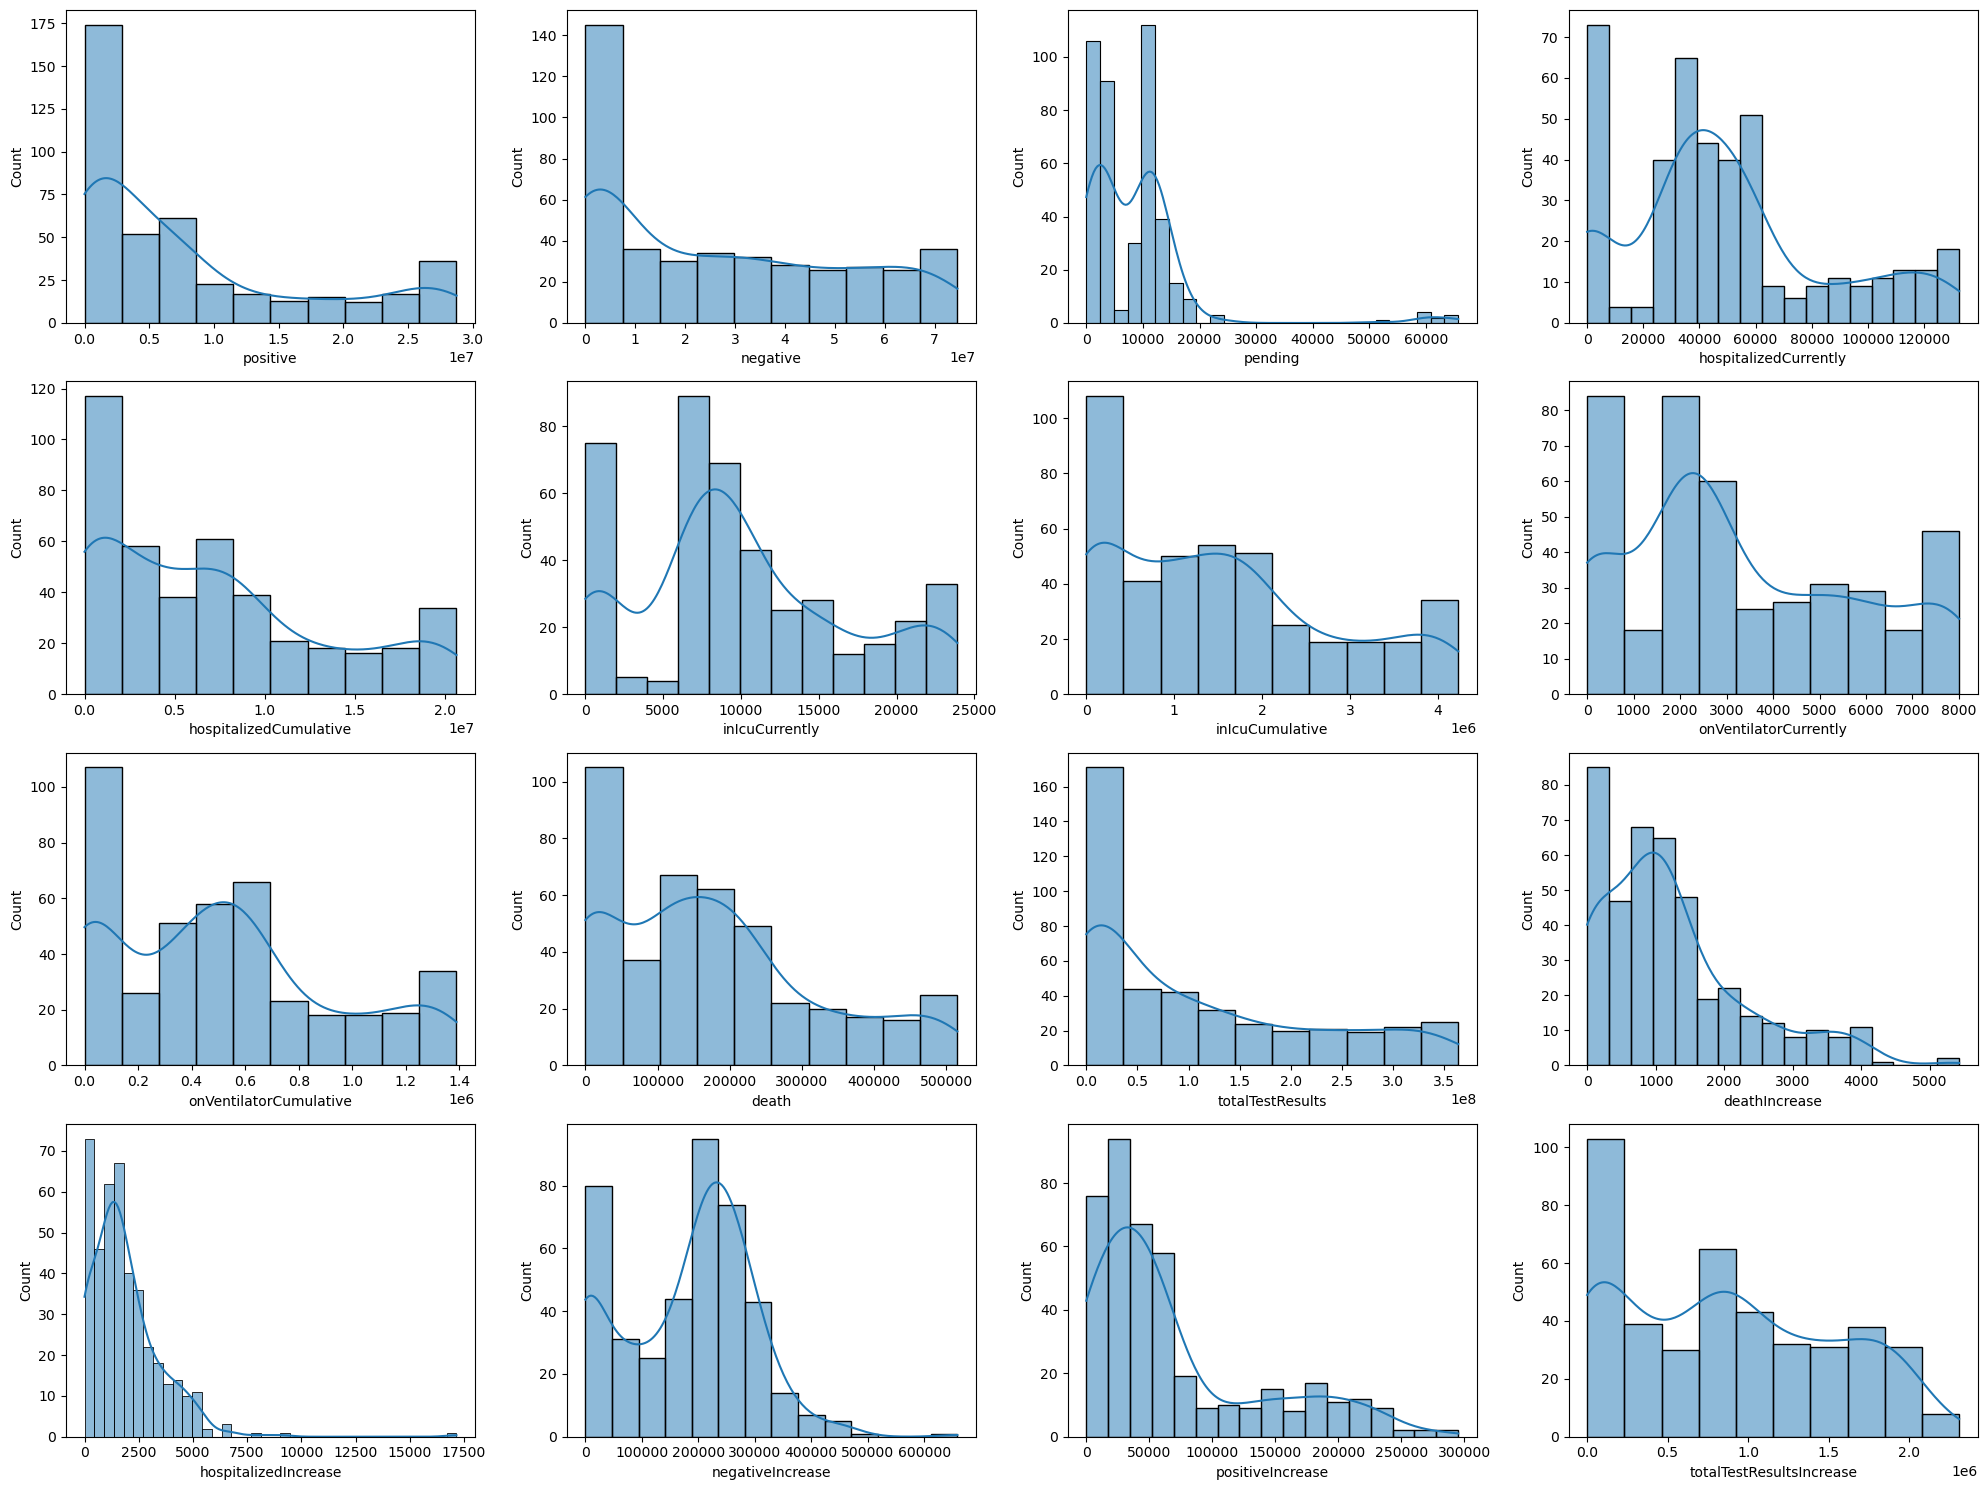

In [444]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.drop(columns = 'date'):
    if plotnumber <= len(df.columns):
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

The data is skewed as it is real world data.

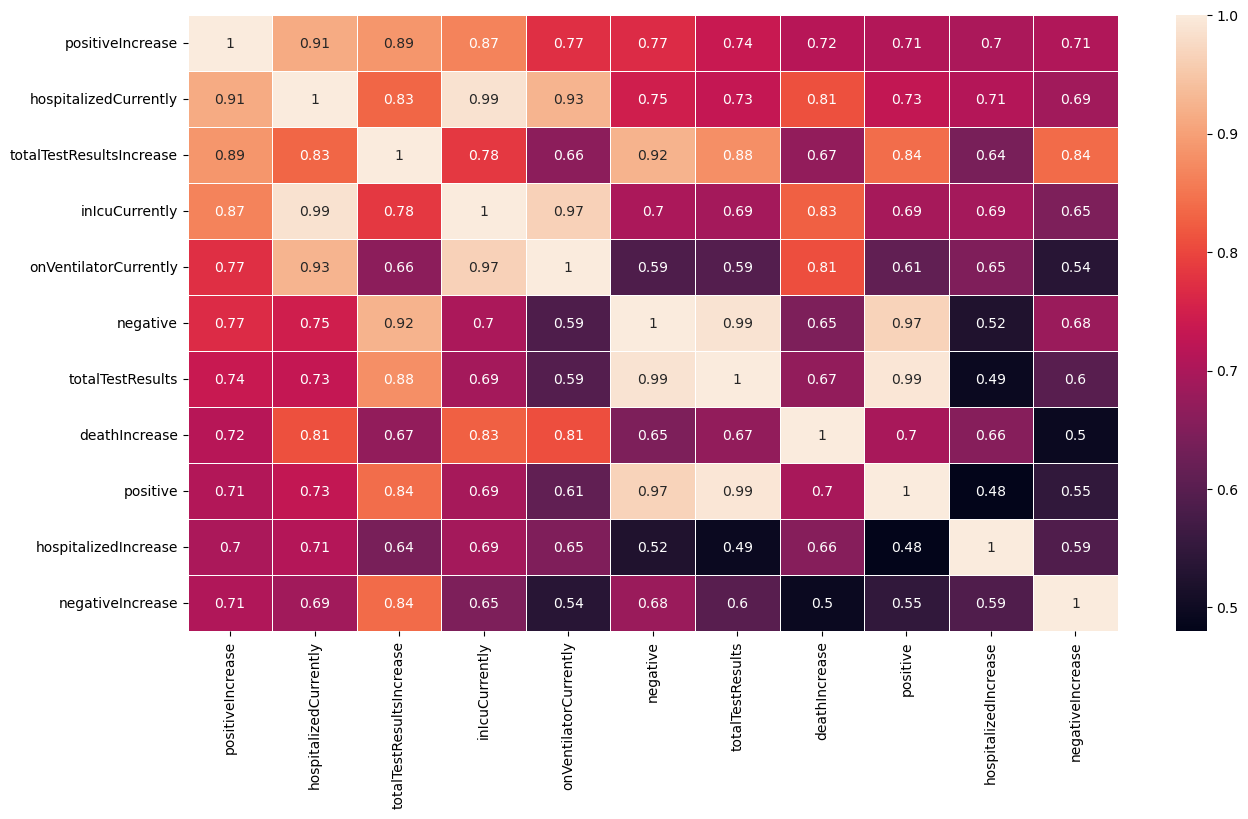

In [438]:
# heatmap of the data
# Choose a subset of columns for the heatmap
subset_columns = ['positiveIncrease','hospitalizedCurrently', 'totalTestResultsIncrease', 'inIcuCurrently', 'onVentilatorCurrently', 'negative', 'totalTestResults', 'deathIncrease', 'positive', 'hospitalizedIncrease', 'negativeIncrease']

plt.figure(figsize = (15, 8))
sns.heatmap(df[subset_columns].corr(), annot = True, linewidths = 0.5)
plt.show()

In [525]:
# Calculate the correlation list
target_corr = df[subset_columns].corr()['positiveIncrease'].abs().sort_values(ascending=False)[1:]
print(target_corr)

hospitalizedCurrently       0.912861
totalTestResultsIncrease    0.887622
inIcuCurrently              0.865754
onVentilatorCurrently       0.773352
negative                    0.766669
totalTestResults            0.736161
deathIncrease               0.715154
positive                    0.707689
negativeIncrease            0.706368
hospitalizedIncrease        0.699608
Name: positiveIncrease, dtype: float64


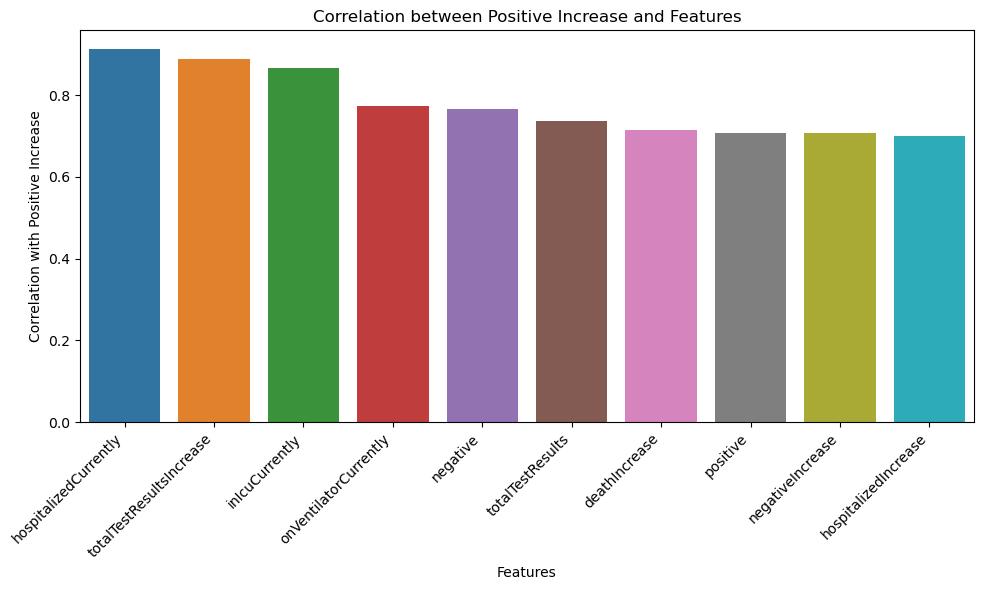

In [527]:
# Create a bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with Positive Increase')
plt.title('Correlation between Positive Increase and Features')
plt.tight_layout()
plt.show()

We can see here which features correlate with the classification the most.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


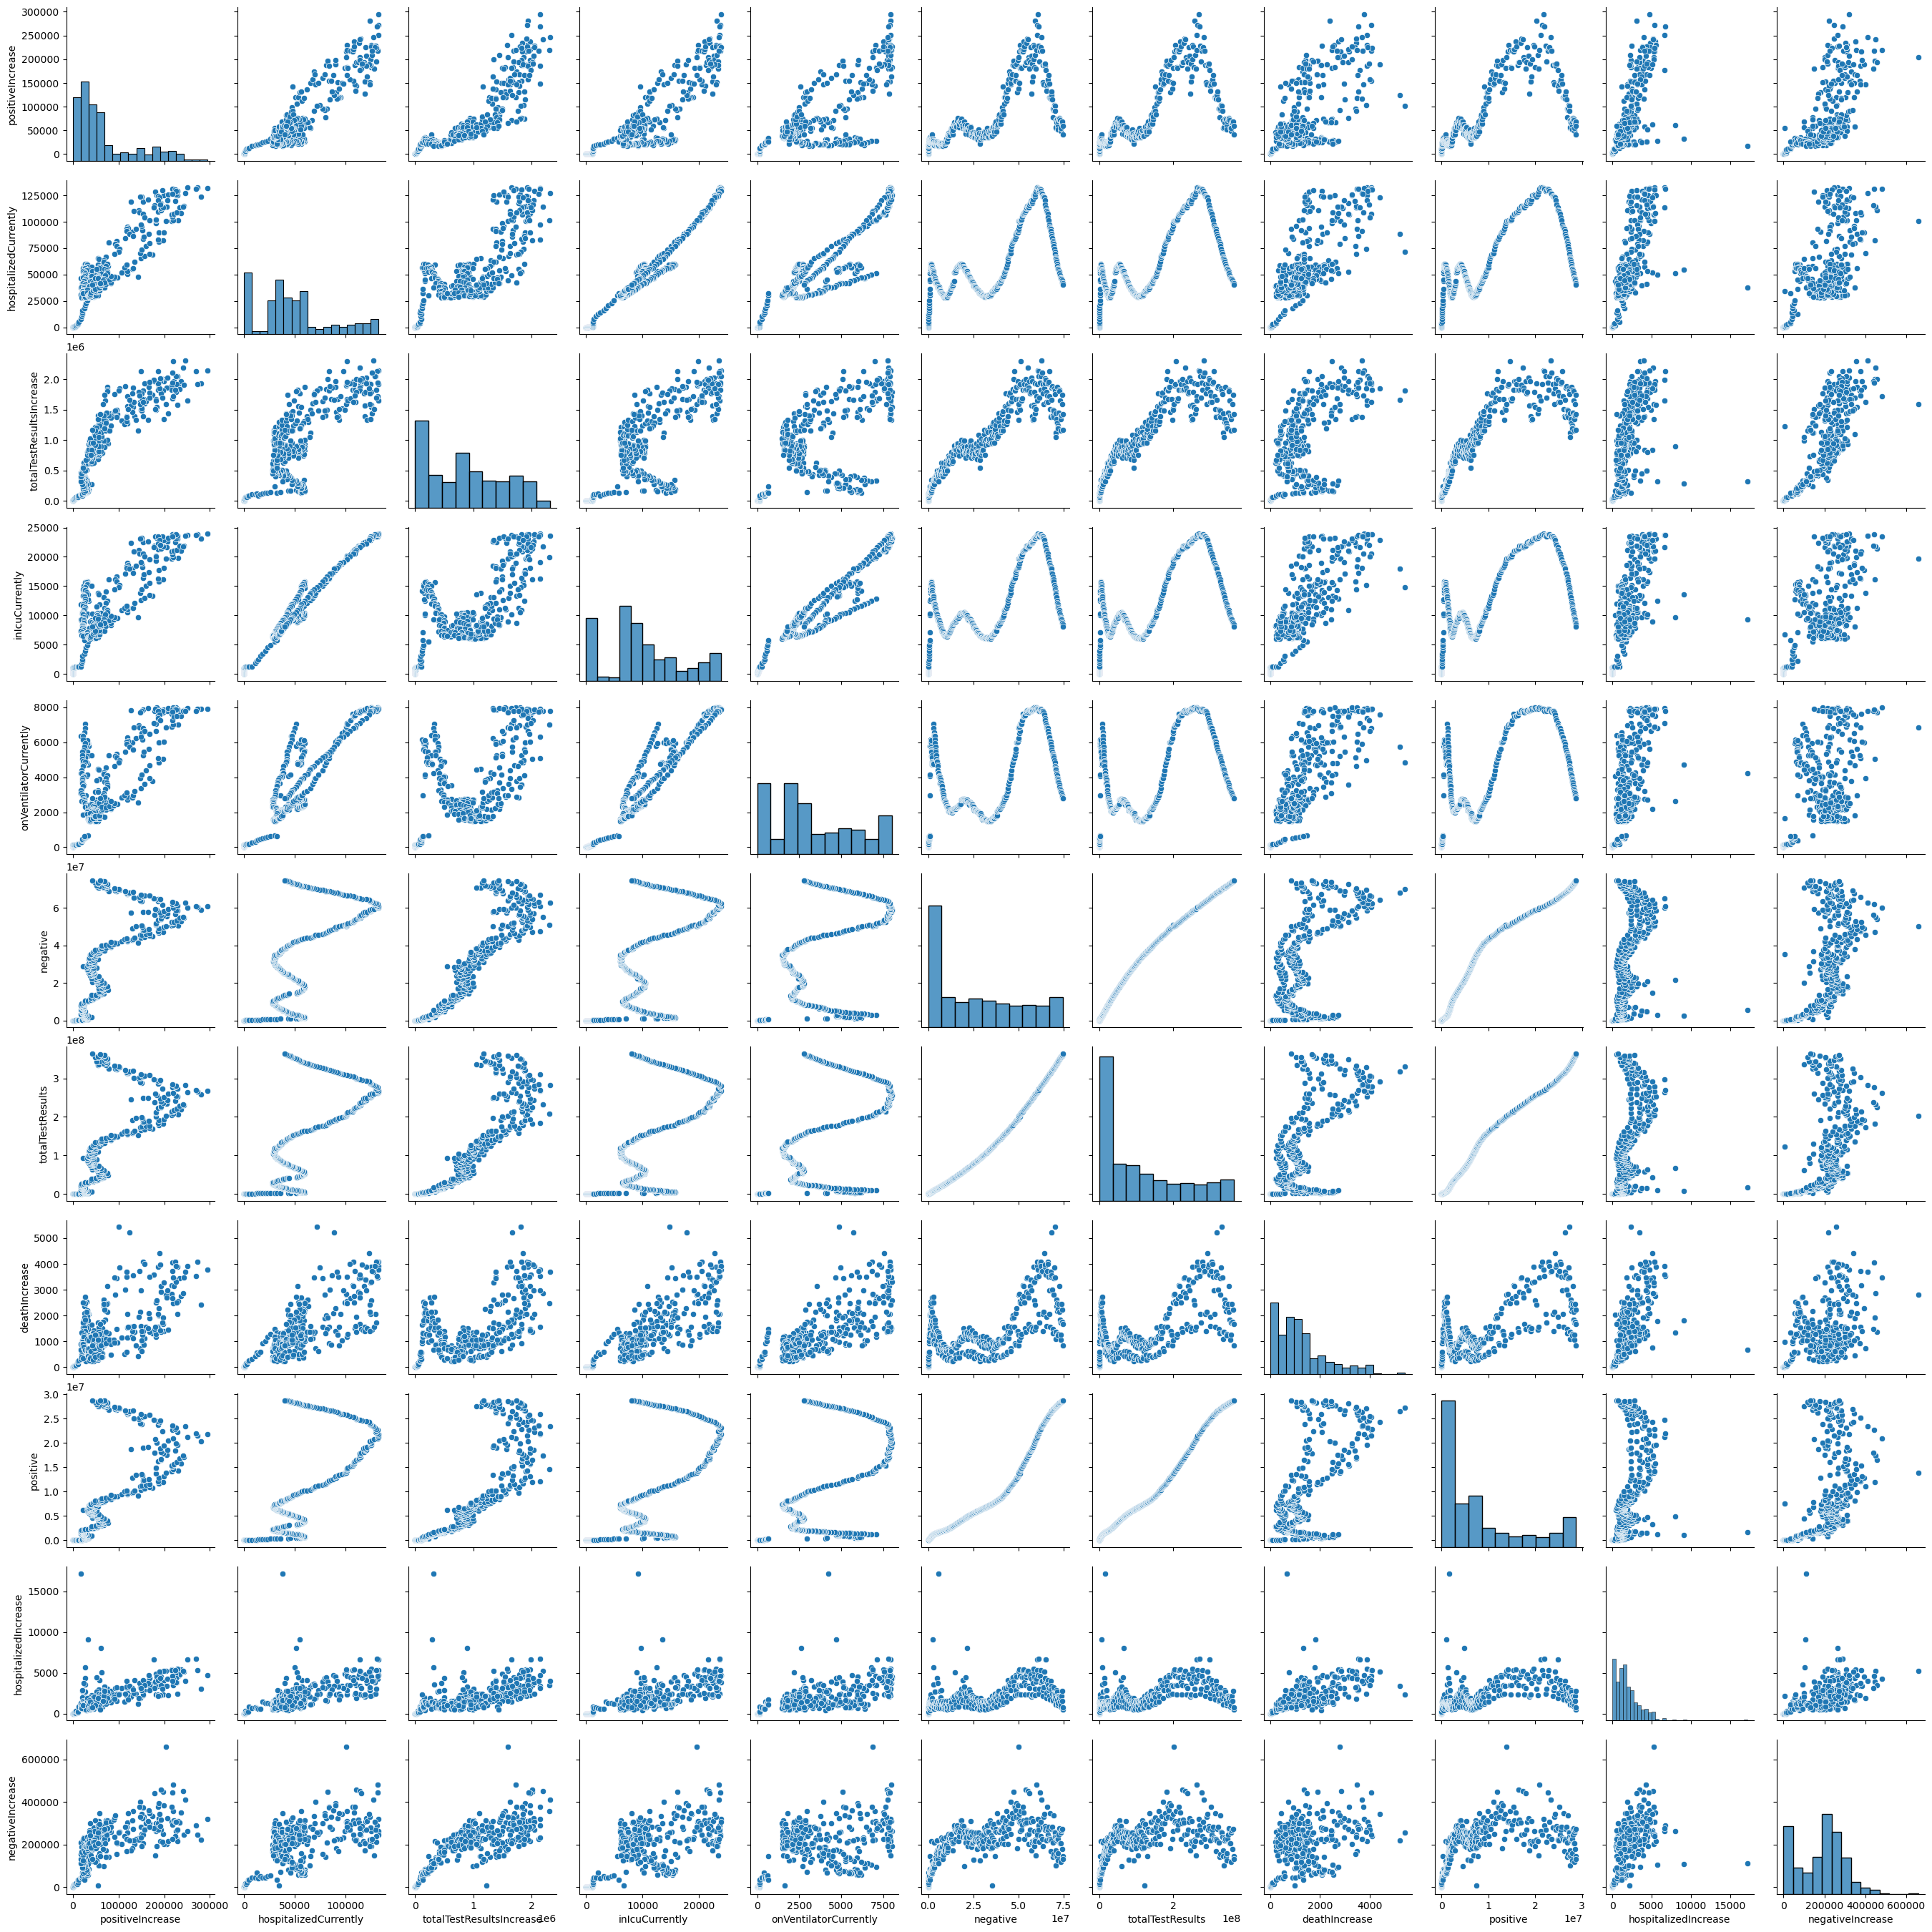

In [441]:
# Choose a subset of columns for the pairplot
subset_columns = ['positiveIncrease','hospitalizedCurrently', 'totalTestResultsIncrease', 'inIcuCurrently', 'onVentilatorCurrently', 'negative', 'totalTestResults', 'deathIncrease', 'positive', 'hospitalizedIncrease', 'negativeIncrease']

# Create a pairplot
sns.pairplot(df[subset_columns])
plt.show()

Some correlations are also present here, but we can also see there are some outliers.

# Modeling

## Splitting, Transforming and Scaling the Data

In [452]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

X = df.drop(columns=['date', 'positiveIncrease', 'pending', 'hospitalizedCumulative', 'inIcuCumulative', 'onVentilatorCumulative', 'negative', 'positive', 'totalTestResults', 'death'])
y = df['positiveIncrease']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your pipeline
pipeline = Pipeline([
    ('yeo_johnson_transform', PowerTransformer(method='yeo-johnson')),
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler()),
])

# Apply the pipeline to the data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Trying out Different Supervised Machine Learning Algorithms

In [464]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ridge': Ridge(),
    'KNeighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

mae_scores = {}
mse_scores = {}
r2_scores = {}

best_model = None
best_score = float('-inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_scores[name] = mean_absolute_error(y_test, y_pred)
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    r2_scores[name] = r2_score(y_test, y_pred)
    
    # Print the model's parameters and metrics
    print(f'Parameters for {name}: {model.get_params()}')
    print(f'{name}: MAE={mae_scores[name]:.2f}, MSE={mse_scores[name]:.2f}, R2={r2_scores[name]:.2f}')
    print()
    
    # Update the best model based on lowest MAE
    if r2_scores[name] > best_score:
        best_model = model
        best_score = r2_scores[name]

print(f'Best Model: {best_model}')

Parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Linear Regression: MAE=24355.61, MSE=979438136.39, R2=0.82

Parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Random Forest: MAE=6997.02, MSE=151389684.61, R2=0.97

Parameters for Gradient Boosting: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change':

Plotting the results

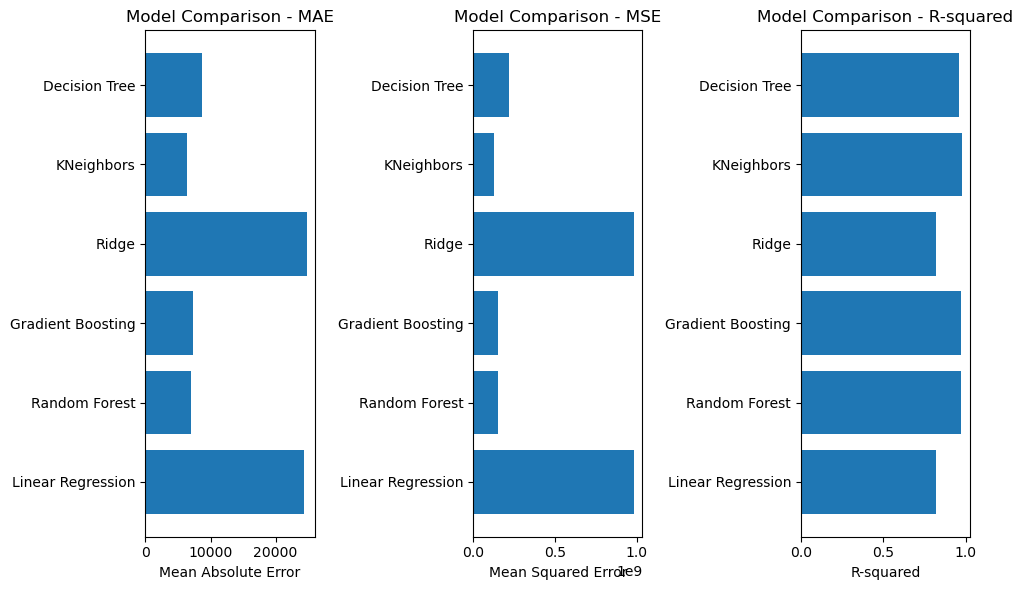

In [466]:
# Plotting results
plt.figure(figsize=(10, 6))

# MAE scores
plt.subplot(1, 3, 1)
plt.barh(list(mae_scores.keys()), list(mae_scores.values()))
plt.xlabel('Mean Absolute Error')
plt.title('Model Comparison - MAE')

# MSE scores
plt.subplot(1, 3, 2)
plt.barh(list(mse_scores.keys()), list(mse_scores.values()))
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison - MSE')

# R2 scores
plt.subplot(1, 3, 3)
plt.barh(list(r2_scores.keys()), list(r2_scores.values()))
plt.xlabel('R-squared')
plt.title('Model Comparison - R-squared')

plt.tight_layout()
plt.show()

We can see both the Random Forest Regressor, KNeighbours, Decision Tree and Gradient Boosting are on the top here with **R2 > 95%**

Let's look at the scatter plot of model predictions vs Ground Truth

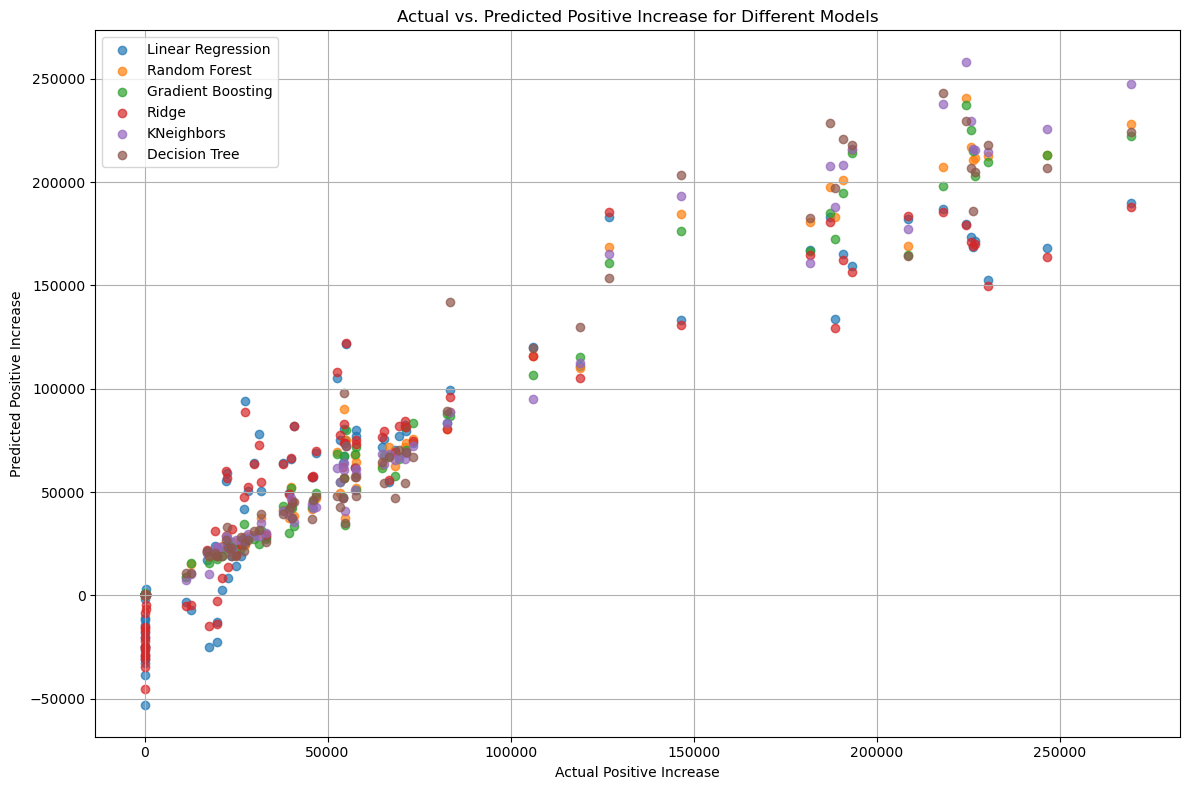

In [467]:
# Additional plots for comparing model predictions
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Scatter plot for predictions vs. actual values
    plt.scatter(y_test, y_pred, label=name, alpha=0.7)

plt.xlabel('Actual Positive Increase')
plt.ylabel('Predicted Positive Increase')
plt.title('Actual vs. Predicted Positive Increase for Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The other models are mostly positevly correlating and are giving hope.

## Top Peroformers

Let's take a closer look at our top performers.

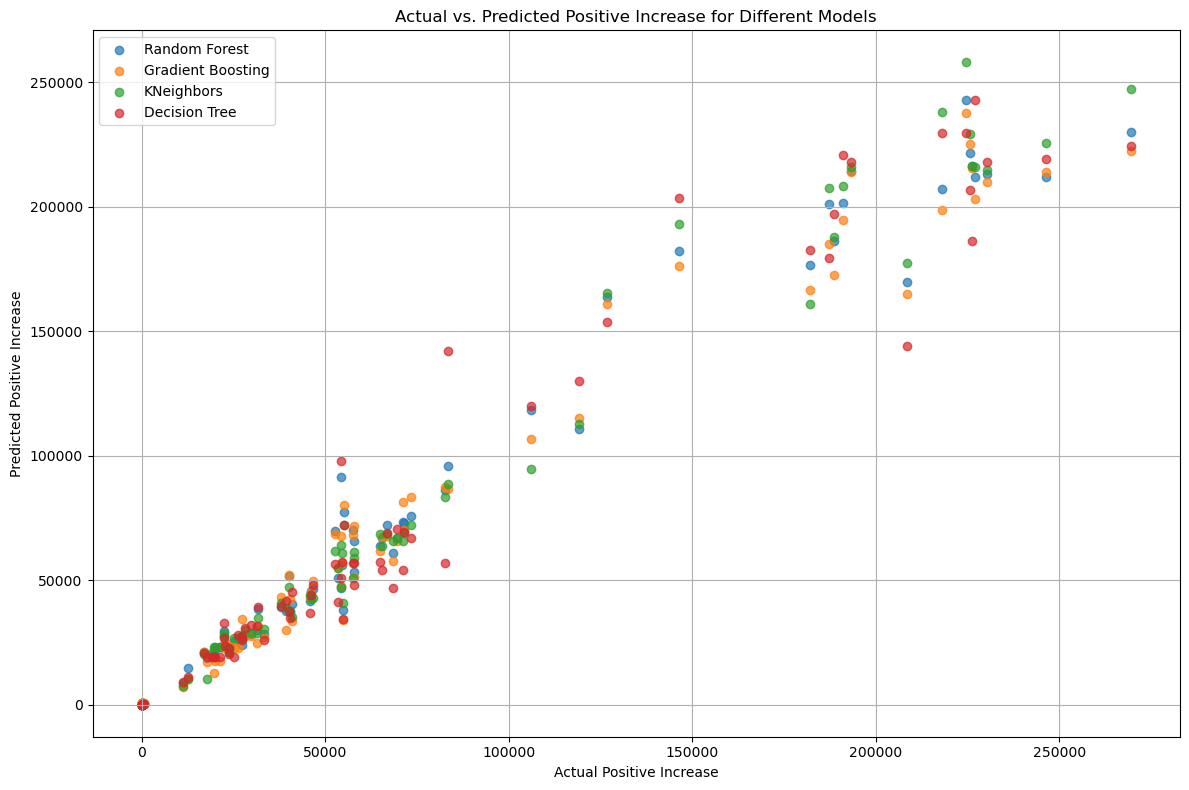

In [468]:
# Additional plots for comparing model predictions
plt.figure(figsize=(12, 8))

models_to_plot = ['KNeighbors', 'Random Forest', 'Gradient Boosting', 'Decision Tree']

for name, model in models.items():
    if name in models_to_plot:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Scatter plot for predictions vs. actual values
        plt.scatter(y_test, y_pred, label=name, alpha=0.7)

plt.xlabel('Actual Positive Increase')
plt.ylabel('Predicted Positive Increase')
plt.title('Actual vs. Predicted Positive Increase for Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can see here that these three models are somewhat close to each other and the actual values. So, we will continue using them.

Now, let's try to squeeze every little bit of power from these models to get higher results by using a grid search.

### KNR

Parameters for KNeighbors: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

KNeighbors: MAE=6454.18, MSE=126553047.88, R2=0.98

In [496]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
KNR_grid_params = {
    'n_neighbors': [5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [1, 10, 20, 30],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV for KNeighborsRegressor
KNR_grid = GridSearchCV(KNeighborsRegressor(), KNR_grid_params, scoring='r2', refit=True, verbose=1, cv=5)
KNR_grid.fit(X_train, y_train)

# Get the best models and predictions
KNR_model = KNR_grid.best_estimator_

KNR_best_params = KNR_grid.best_params_
print(f"Best params: {KNR_best_params}")

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best params: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [498]:
KNR_model_pred = KNR_model.predict(X_test)

# Calculate evaluation metrics
KNR_mae = mean_absolute_error(y_test, KNR_model_pred)
KNR_mse = mean_squared_error(y_test, KNR_model_pred)
KNR_rmse = np.sqrt(KNR_mse)
KNR_r2 = r2_score(y_test, KNR_model_pred)

print("Best KNeighbors Model Evaluation:")
print("Best KNeighbors Model:", KNR_model)
print("MAE:", KNR_mae)
print("MSE:", KNR_mse)
print("RMSE:", KNR_rmse)
print("R-squared:", KNR_r2)

Best KNeighbors Model Evaluation:
Best KNeighbors Model: KNeighborsRegressor(leaf_size=1, weights='distance')
MAE: 6473.304209994912
MSE: 132677492.33190037
RMSE: 11518.571627241825
R-squared: 0.9753900539588369


### GBR

Parameters for Gradient Boosting: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Gradient Boosting: MAE=7350.99, MSE=151186869.78, R2=0.97

In [499]:
# Define hyperparameter grids for GradientBoostingRegressor
GBR_grid_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Perform GridSearchCV for GradientBoostingRegressor
GBR_grid = GridSearchCV(GradientBoostingRegressor(), GBR_grid_params, scoring='r2', refit=True, verbose=1, cv=5)
GBR_grid.fit(X_train, y_train)

# Get the best models and predictions
GBR_model = GBR_grid.best_estimator_

GBR_best_params = GBR_grid.best_params_
print(f"Best params: {GBR_best_params}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [500]:
GBR_model_pred = GBR_model.predict(X_test)

# Calculate evaluation metrics
GBR_mae = mean_absolute_error(y_test, GBR_model_pred)
GBR_mse = mean_squared_error(y_test, GBR_model_pred)
GBR_rmse = np.sqrt(GBR_mse)
GBR_r2 = r2_score(y_test, GBR_model_pred)

print("Gradient Boosting Regressor Model Evaluation:")
print("Best Gradient Boosting Regressor Model:", GBR_model)
print("MAE:", GBR_mae)
print("MSE:", GBR_mse)
print("RMSE:", GBR_rmse)
print("R-squared:", GBR_r2)

Gradient Boosting Regressor Model Evaluation:
Best Gradient Boosting Regressor Model: GradientBoostingRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                          min_samples_split=10)
MAE: 7139.272642222933
MSE: 122595333.42599787
RMSE: 11072.277698197326
R-squared: 0.9772601630654517


### DTR

Parameters for Decision Tree: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Decision Tree: MAE=8754.65, MSE=219368398.68, R2=0.96

In [514]:
# Define hyperparameter grids for DecisionTreeRegressor
DTR_grid_params = {
    'max_depth': [None, 3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2', 0.5],
    'splitter': ['best', 'random']
}

# Perform GridSearchCV for DecisionTreeRegressor
DTR_grid = GridSearchCV(DecisionTreeRegressor(), DTR_grid_params, scoring='r2', refit=True, verbose=1, cv=5)
DTR_grid.fit(X_train, y_train)

# Get the best models and predictions
DTR_model = DTR_grid.best_estimator_

DTR_best_params = DTR_grid.best_params_
print(f"Best params: {DTR_best_params}")

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [515]:
DTR_model_pred = DTR_model.predict(X_test)

# Calculate evaluation metrics for DecisionTreeRegressor
DTR_mae = mean_absolute_error(y_test, DTR_model_pred)
DTR_mse = mean_squared_error(y_test, DTR_model_pred)
DTR_rmse = np.sqrt(DTR_mse)
DTR_r2 = r2_score(y_test, DTR_model_pred)

print("Decision Tree Regressor Model Evaluation:")
print("Best Decision Tree Regressor Model:", DTR_model)
print("MAE:", DTR_mae)
print("MSE:", DTR_mse)
print("RMSE:", DTR_rmse)
print("R-squared:", DTR_r2)

Decision Tree Regressor Model Evaluation:
Best Decision Tree Regressor Model: DecisionTreeRegressor(max_depth=5)
MAE: 9374.69516372525
MSE: 239273507.07026726
RMSE: 15468.468155259177
R-squared: 0.955617882169881


### RFR

Parameters for Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Random Forest: MAE=6997.02, MSE=151389684.61, R2=0.97

In [518]:
# Define hyperparameter grids
RFR_grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 1],
    'bootstrap': [True, False]
}

# Perform GridSearchCV for RandomForestRegressor
RFR_grid = GridSearchCV(RandomForestRegressor(), RFR_grid_params, scoring='r2', refit=True, verbose=1, cv=5)
RFR_grid.fit(X_train, y_train)

# Get the best models and predictions
RFR_model = RFR_grid.best_estimator_

RFR_best_params = RFR_grid.best_params_
print(f"Best params: {RFR_best_params}")

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best params: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [519]:
RFR_model_pred = RFR_model.predict(X_test)

# Calculate evaluation metrics
RFR_mae = mean_absolute_error(y_test, RFR_model_pred)
RFR_mse = mean_squared_error(y_test, RFR_model_pred)
RFR_rmse = np.sqrt(RFR_mse)
RFR_r2 = r2_score(y_test, RFR_model_pred)

print("Best RandomForestRegressor Model Evaluation:")
print("Best RandomForestRegressor Model:", RFR_model)
print("MAE:", RFR_mae)
print("MSE:", RFR_mse)
print("RMSE:", RFR_rmse)
print("R-squared:", RFR_r2)

Best RandomForestRegressor Model Evaluation:
Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_split=5, n_estimators=50)
MAE: 6835.975463018708
MSE: 145502951.72068304
RMSE: 12062.46043395306
R-squared: 0.973011098357826


## Scores

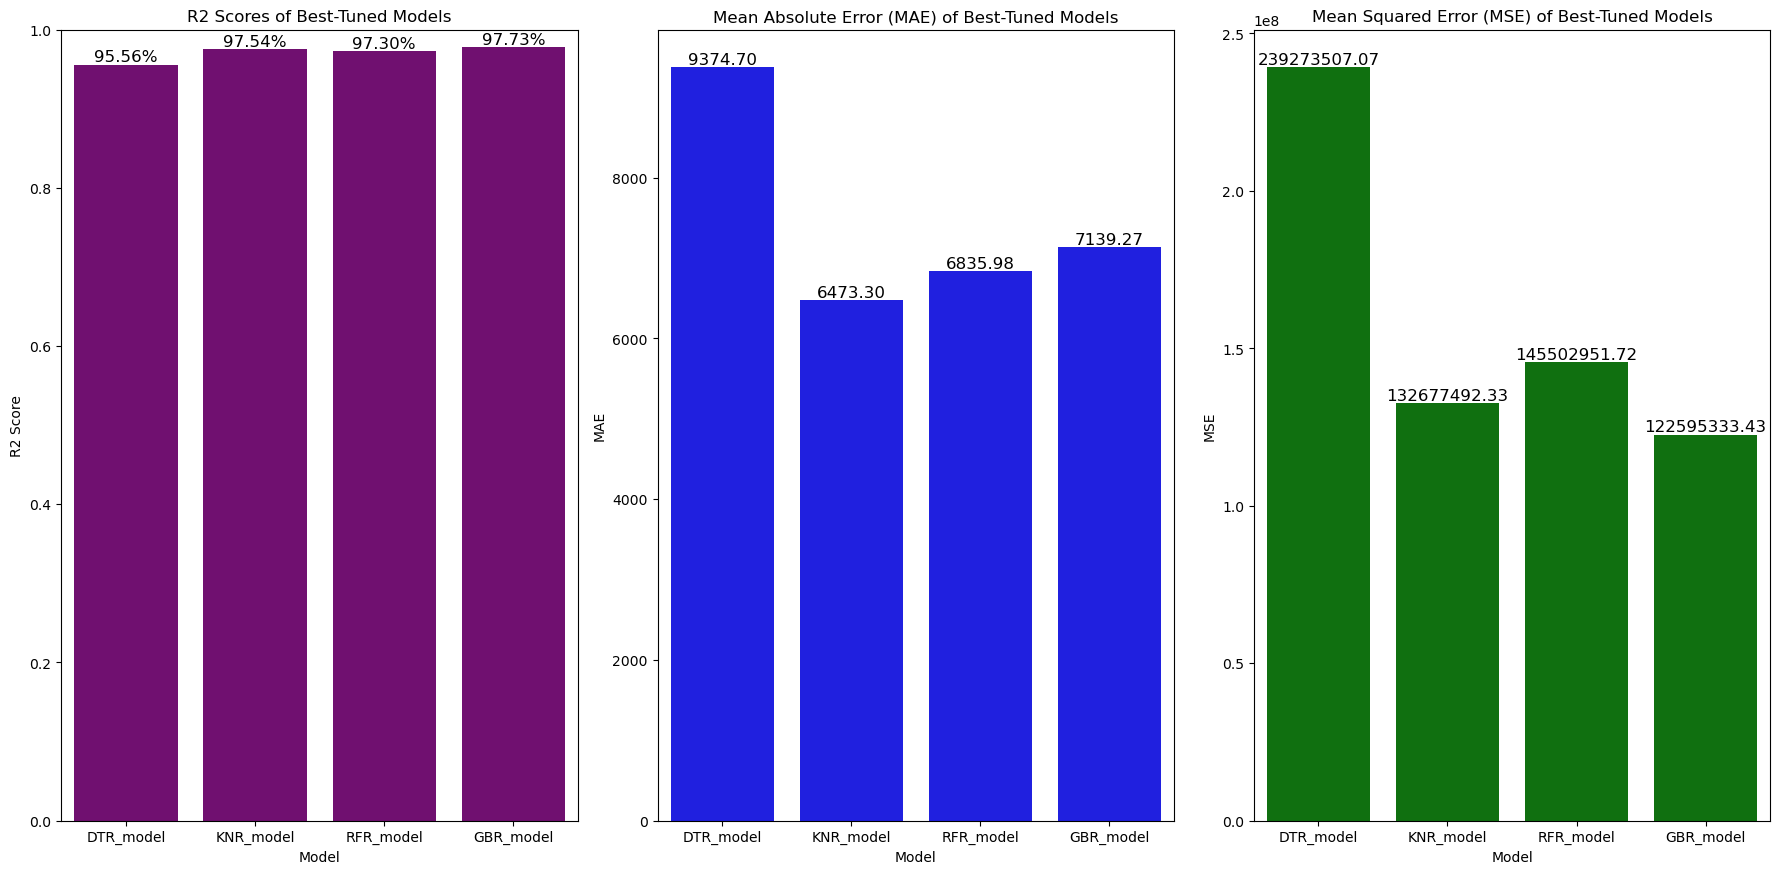

In [520]:
# Create a bar plot to visualize scores of the models
models = ['DTR_model', 'KNR_model', 'RFR_model', 'GBR_model']
r2_scores = [DTR_r2, KNR_r2, RFR_r2, GBR_r2]
mae_scores = [DTR_mae, KNR_mae, RFR_mae, GBR_mae]
mse_scores = [DTR_mse, KNR_mse, RFR_mse, GBR_mse]

plt.figure(figsize=(18, 9))

# R2 plot
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=r2_scores, color='purple')
plt.title('R2 Scores of Best-Tuned Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(0, 1)

for i, score in enumerate(r2_scores):
    plt.text(i, score, f'{score*100:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# MAE plot
plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mae_scores, color='blue')
plt.title('Mean Absolute Error (MAE) of Best-Tuned Models')
plt.xlabel('Model')
plt.ylabel('MAE')

for i, score in enumerate(mae_scores):
    plt.text(i, score + 0.05, f'{score:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# MSE plot
plt.subplot(1, 3, 3)
sns.barplot(x=models, y=mse_scores, color='green')
plt.title('Mean Squared Error (MSE) of Best-Tuned Models')
plt.xlabel('Model')
plt.ylabel('MSE')

for i, score in enumerate(mse_scores):
    plt.text(i, score + 50, f'{score:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


We can say the best model is the Gradient Boosting Regressor, but it is really close.

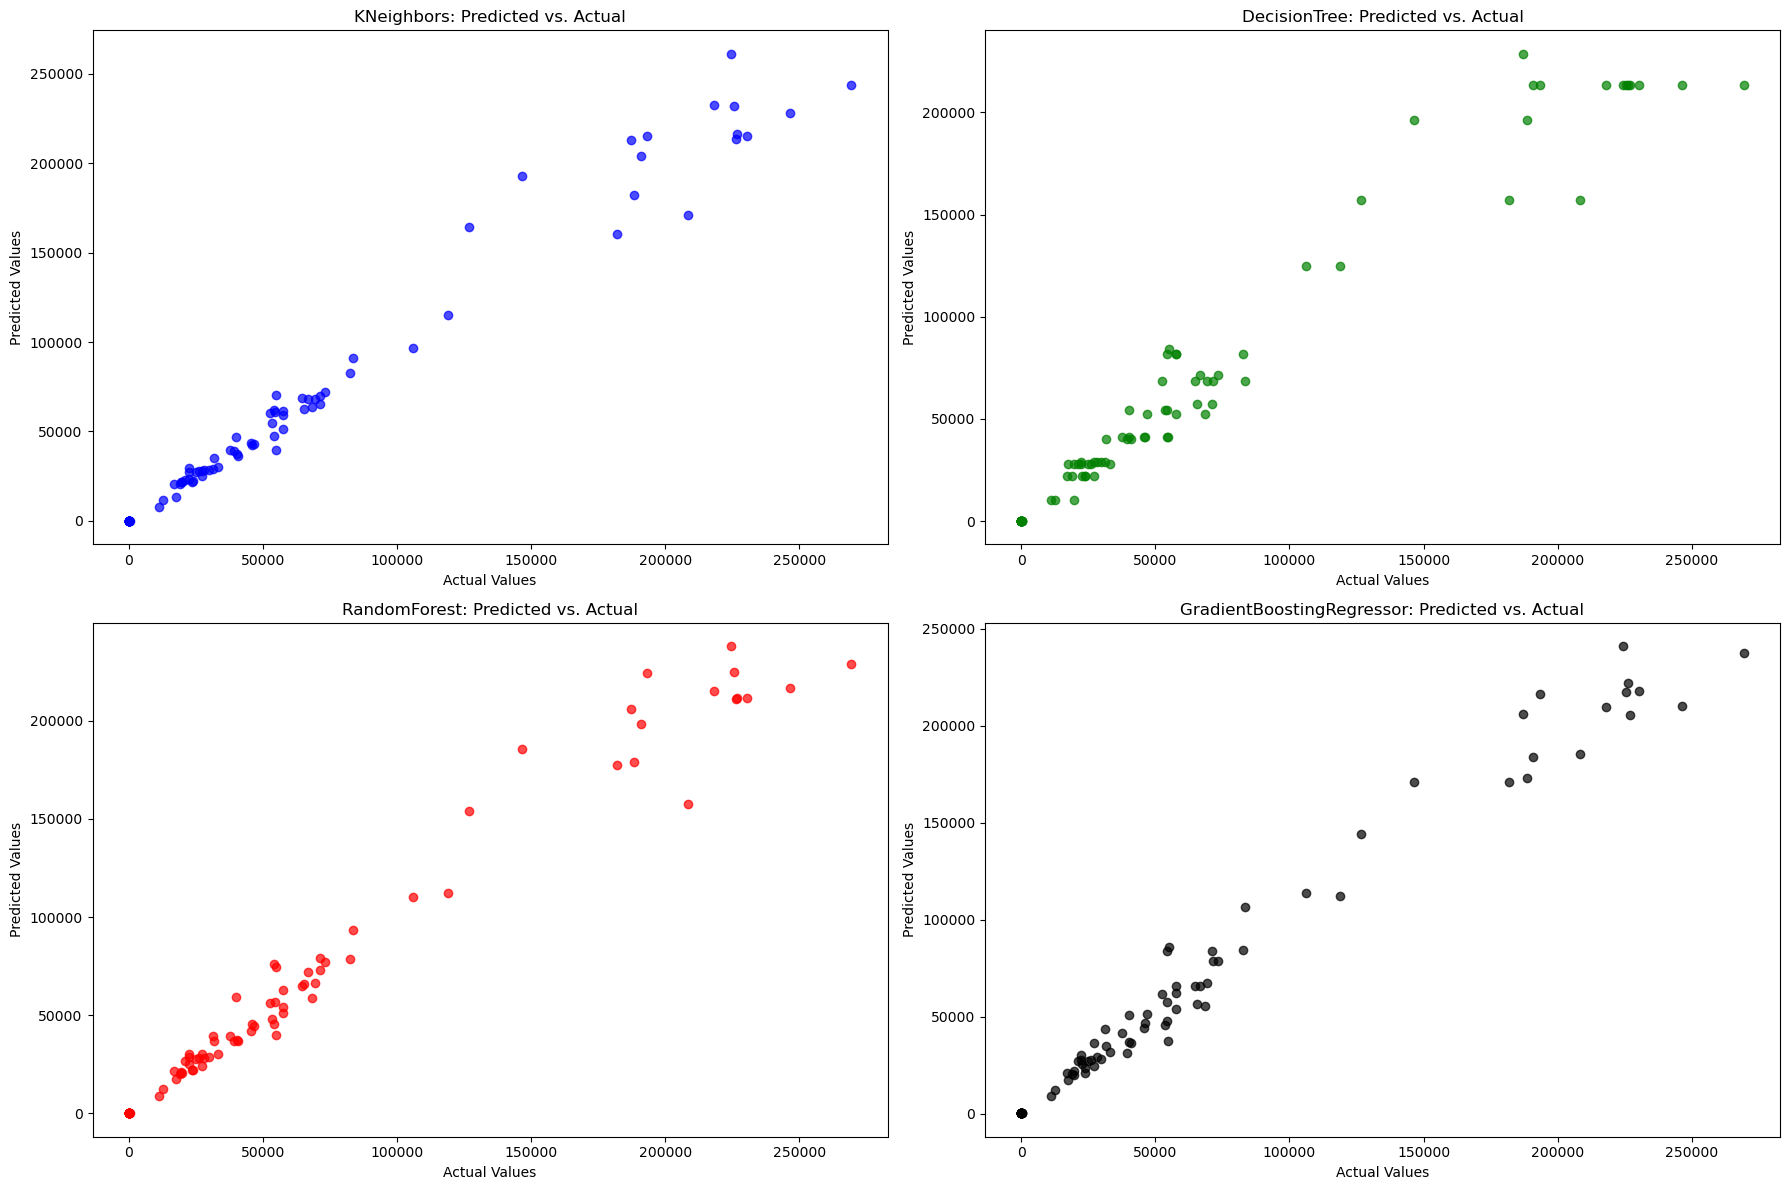

In [521]:
# Create scatter plots to compare predicted vs. actual values for each model
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.scatter(y_test, KNR_model_pred, color='blue', alpha=0.7)
plt.title('KNeighbors: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 2)
plt.scatter(y_test, DTR_model_pred, color='green', alpha=0.7)
plt.title('DecisionTree: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 3)
plt.scatter(y_test, RFR_model_pred, color='red', alpha=0.7)
plt.title('RandomForest: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 4)
plt.scatter(y_test, GBR_model_pred, color='black', alpha=0.7)
plt.title('GradientBoostingRegressor: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

Again the Gradient Boosting Regressor is showing the best results compared to the true values.

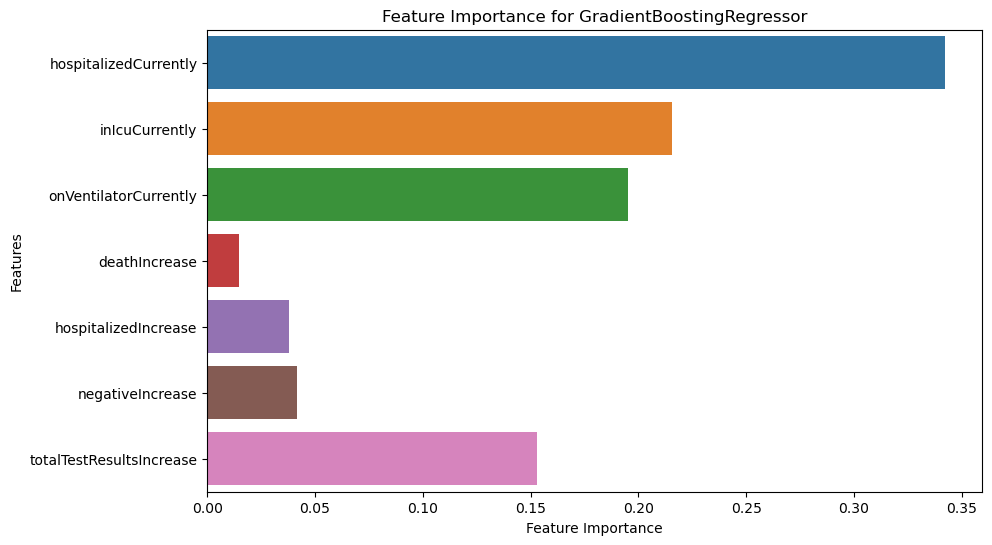

In [522]:
# Feature Importance Plot
feature_importances = GBR_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for GradientBoostingRegressor')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Export Model

Exporting GBR_model to deploy it on streamlit

In [523]:
import pickle
# Save the model
with open('GBR_model.pkl','wb') as file:
    pickle.dump(GBR_model, file)

In [524]:
# Save the preprocessing pipeline
with open('preprocessing_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Deployed Model

Covid-19 Prediction Application on Streamlit

https://covid-19casepredictionapp-kje9ropaqfuekhjdhyqgng.streamlit.app/